In [1]:
from PIL import Image
from imagehash import average_hash
import os

In [2]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  

In [3]:
print("Non Demented")
print("No of images: ",len(path1))
def find_duplicates(image_paths):
  seen_hashes = {}
  duplicates = []
  for path in image_paths:
    try:
      img = Image.open(path)
      hash = average_hash(img)
      if hash in seen_hashes:
        duplicates.append((path, seen_hashes[hash]))
      else:
        seen_hashes[hash] = path
    except (IOError, OSError) as e:
      print(f"Error processing {path}: {e}")
  return duplicates

# Example usage:
image_paths = path1
duplicates = find_duplicates(image_paths)

if duplicates:
  print("No of duplicate images: ", len(duplicates))
#   print("Found duplicate images:")
#   for d in duplicates:
#     print(f"\t{d[0]} is a duplicate of {d[1]}")
else:
  print("No duplicates found!")

Non Demented
No of images:  67222
No of duplicate images:  57877


In [4]:
print("Mild Dementia")
print("No of images: ",len(path2))
def find_duplicates(image_paths):
  seen_hashes = {}
  duplicates = []
  for path in image_paths:
    try:
      img = Image.open(path)
      hash = average_hash(img)
      if hash in seen_hashes:
        duplicates.append((path, seen_hashes[hash]))
      else:
        seen_hashes[hash] = path
    except (IOError, OSError) as e:
      print(f"Error processing {path}: {e}")
  return duplicates

# Example usage:
image_paths = path2
duplicates = find_duplicates(image_paths)

if duplicates:
  print("No of duplicate images: ", len(duplicates))
#   print("Found duplicate images:")
#   for d in duplicates:
#     print(f"\t{d[0]} is a duplicate of {d[1]}")
else:
  print("No duplicates found!")

Mild Dementia
No of images:  5002
No of duplicate images:  3705


In [5]:
print("Moderate Dementia")
print("No of images: ",len(path3))
def find_duplicates(image_paths):
  seen_hashes = {}
  duplicates = []
  for path in image_paths:
    try:
      img = Image.open(path)
      hash = average_hash(img)
      if hash in seen_hashes:
        duplicates.append((path, seen_hashes[hash]))
      else:
        seen_hashes[hash] = path
    except (IOError, OSError) as e:
      print(f"Error processing {path}: {e}")
  return duplicates

# Example usage:
image_paths = path3
duplicates = find_duplicates(image_paths)

if duplicates:
  print("No of duplicate images: ", len(duplicates))
#   print("Found duplicate images:")
#   for d in duplicates:
#     print(f"\t{d[0]} is a duplicate of {d[1]}")
else:
  print("No duplicates found!")

Moderate Dementia
No of images:  488
No of duplicate images:  327


In [6]:
print("Very mild Dementia")
print("No of images: ",len(path4))
def find_duplicates(image_paths):
  seen_hashes = {}
  duplicates = []
  for path in image_paths:
    try:
      img = Image.open(path)
      hash = average_hash(img)
      if hash in seen_hashes:
        duplicates.append((path, seen_hashes[hash]))
      else:
        seen_hashes[hash] = path
    except (IOError, OSError) as e:
      print(f"Error processing {path}: {e}")
  return duplicates

# Example usage:
image_paths = path4
duplicates = find_duplicates(image_paths)

if duplicates:
  print("No of duplicate images: ", len(duplicates))
#   print("Found duplicate images:")
#   for d in duplicates:
#     print(f"\t{d[0]} is a duplicate of {d[1]}")
else:
  print("No duplicates found!")

Very mild Dementia
No of images:  13725
No of duplicate images:  10667


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, Flatten
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# Importing packages 

import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import re
import os
import random
import tensorflow as tf
import plotly.express as px
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, average_precision_score, confusion_matrix, roc_auc_score, f1_score, confusion_matrix, precision_recall_fscore_support
from tensorflow.keras.applications import EfficientNetB0, EfficientNetV2B1
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import clone_model
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from PIL import Image
from scipy.stats import skew
from tqdm import tqdm

In [9]:
IMG_SIZE=(224,224)

In [10]:
target_samples=5002
# Undersample large classes
very_mild_demented= random.sample(path4, k=target_samples)
non_demented= random.sample(path1, k=target_samples)

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [12]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict

def load_and_resize_image(path):
    img = Image.open(path)
    img = img.resize((224, 224))
    img = np.array(img)
    return img

# Empty objects to store the data and the class labels (result) in
data = []
labels = []

# Dictionary to keep track of image paths and their occurrence counts
image_counts = defaultdict(int)

# Loop through each category and transform data and result into right format (128x128x3 & one-hot encoded)
# and merge categories together
for path in non_demented:
    img = load_and_resize_image(path)
    if img.shape == (224, 224, 3):
        # Check for duplicate images
        if image_counts[path] == 0:
            # If image is not a duplicate, append it to data and labels
            data.append(img)
            labels.append(encoder.transform([[0]]).toarray())
        else:
            # Assign lower weight to duplicate images
            data.append(img)
            labels.append(encoder.transform([[0]]).toarray()* 0.1)  # You can adjust the weight as per your requirement
        image_counts[path] += 1

for path in very_mild_demented:
    img = load_and_resize_image(path)
    if img.shape == (224, 224, 3):
        # Check for duplicate images
        if image_counts[path] == 0:
            # If image is not a duplicate, append it to data and labels
            data.append(img)
            labels.append(encoder.transform([[1]]).toarray())
        else:
            # Assign lower weight to duplicate images
            data.append(img)
            labels.append(encoder.transform([[1]]).toarray() * 0.1)  # You can adjust the weight as per your requirement
        image_counts[path] += 1
        
for path in path2:
    img = load_and_resize_image(path)
    if img.shape == (224, 224, 3):
        # Check for duplicate images
        if image_counts[path] == 0:
            # If image is not a duplicate, append it to data and labels
            data.append(img)
            labels.append(encoder.transform([[2]]).toarray())
        else:
            # Assign lower weight to duplicate images
            data.append(img)
            labels.append(encoder.transform([[2]]).toarray() * 0.1)  # You can adjust the weight as per your requirement
        image_counts[path] += 1
        
for path in path3:
    img = load_and_resize_image(path)
    if img.shape == (224, 224, 3):
        # Check for duplicate images
        if image_counts[path] == 0:
            # If image is not a duplicate, append it to data and labels
            data.append(img)
            labels.append(encoder.transform([[3]]).toarray())
        else:
            # Assign lower weight to duplicate images
            data.append(img)
            labels.append(encoder.transform([[3]]).toarray() * 0.1)  # You can adjust the weight as per your requirement
        image_counts[path] += 1

In [13]:
data=np.array(data)
labels=np.array(labels)
#class_images.shape

In [14]:
data.shape

(15494, 224, 224, 3)

In [15]:
labels = np.array(labels)
labels = labels.reshape((15494,4))
labels.shape

(15494, 4)

In [16]:
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(data.reshape(-1, IMG_SIZE[0] * IMG_SIZE[1] * 3), labels)
train_data = train_data.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3)

print(train_data.shape, train_labels.shape)

(20008, 224, 224, 3) (20008, 4)


In [17]:
#Splitting the data into train, test,

#train_data, test_data, train_labels, test_labels = train_test_split(test_data, train_labels, test_size = 0.2, random_state=42)
training_set, test_data, training_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)


In [18]:
print(training_set.shape)
print(training_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(16006, 224, 224, 3)
(16006, 4)
(4002, 224, 224, 3)
(4002, 4)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images randomly by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift images vertically by up to 10% of the height
    horizontal_flip=True,   # Flip images horizontally
    zoom_range=0.1          # Zoom in/out on images by 10%
)

# Fit the ImageDataGenerator to your training data
datagen.fit(training_set)

In [20]:
new_train_data, val_data, new_train_labels, val_labels = train_test_split(
    training_set, training_labels, test_size=0.2, random_state=42
)

In [21]:
print(new_train_data.shape)
print(new_train_labels.shape)
print(val_data.shape)
print(val_labels.shape)

(12804, 224, 224, 3)
(12804, 4)
(3202, 224, 224, 3)
(3202, 4)


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_hub as hub

vit_model_url ="https://www.kaggle.com/models/spsayakpaul/vision-transformer/frameworks/TensorFlow2/variations/vit-b16-fe/versions/1"
vit_model = hub.KerasLayer(vit_model_url, input_shape=(224, 224, 3))
model = models.Sequential([
    vit_model,
    layers.Dropout(0.5),
    layers.Flatten(),  # Use Flatten instead of GlobalAveragePooling2D
    layers.BatchNormalization(),
    layers.Dense(512, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')
])


Attaching model 'spsayakpaul/vision-transformer/tensorflow2/vit-b16-fe/1' to your Kaggle notebook...


In [23]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc')
]

In [24]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=METRICS)

In [25]:
history = model.fit(new_train_data, new_train_labels, validation_data=(val_data, val_labels), epochs=50)

Epoch 1/50
401/401 [==============================] - 234s 547ms/step - loss: 1.2741 - accuracy: 0.7612 - precision: 0.5435 - recall: 0.2807 - auc: 0.7139 - val_loss: 0.9144 - val_accuracy: 0.8099 - val_precision: 0.9800 - val_recall: 0.2445 - val_auc: 0.8427
Epoch 2/50
401/401 [==============================] - 216s 539ms/step - loss: 1.0031 - accuracy: 0.8001 - precision: 0.7603 - recall: 0.2928 - auc: 0.8050 - val_loss: 0.8693 - val_accuracy: 0.8190 - val_precision: 0.9242 - val_recall: 0.3007 - val_auc: 0.8579
Epoch 3/50
401/401 [==============================] - 216s 539ms/step - loss: 0.9490 - accuracy: 0.8091 - precision: 0.8145 - recall: 0.3059 - auc: 0.8268 - val_loss: 0.8673 - val_accuracy: 0.8193 - val_precision: 0.9361 - val_recall: 0.2976 - val_auc: 0.8579
Epoch 4/50
401/401 [==============================] - 216s 539ms/step - loss: 0.9245 - accuracy: 0.8129 - precision: 0.8223 - recall: 0.3208 - auc: 0.8383 - val_loss: 0.8548 - val_accuracy: 0.8215 - val_precision: 0.9171

In [26]:
# Convert true test labels to integers
y_test_int = np.argmax(test_labels, axis=1)

# Evaluate on test set 
testeval = model.evaluate(test_data, test_labels, verbose=2)

# Print performance metrics (loss and accuracy)
print("Test Loss:", testeval[0])
print("Test Accuracy:", testeval[1])

126/126 - 53s - loss: 0.5991 - accuracy: 0.8815 - precision: 0.8868 - recall: 0.6029 - auc: 0.9424 - 53s/epoch - 420ms/step
Test Loss: 0.5990606546401978
Test Accuracy: 0.8814967274665833


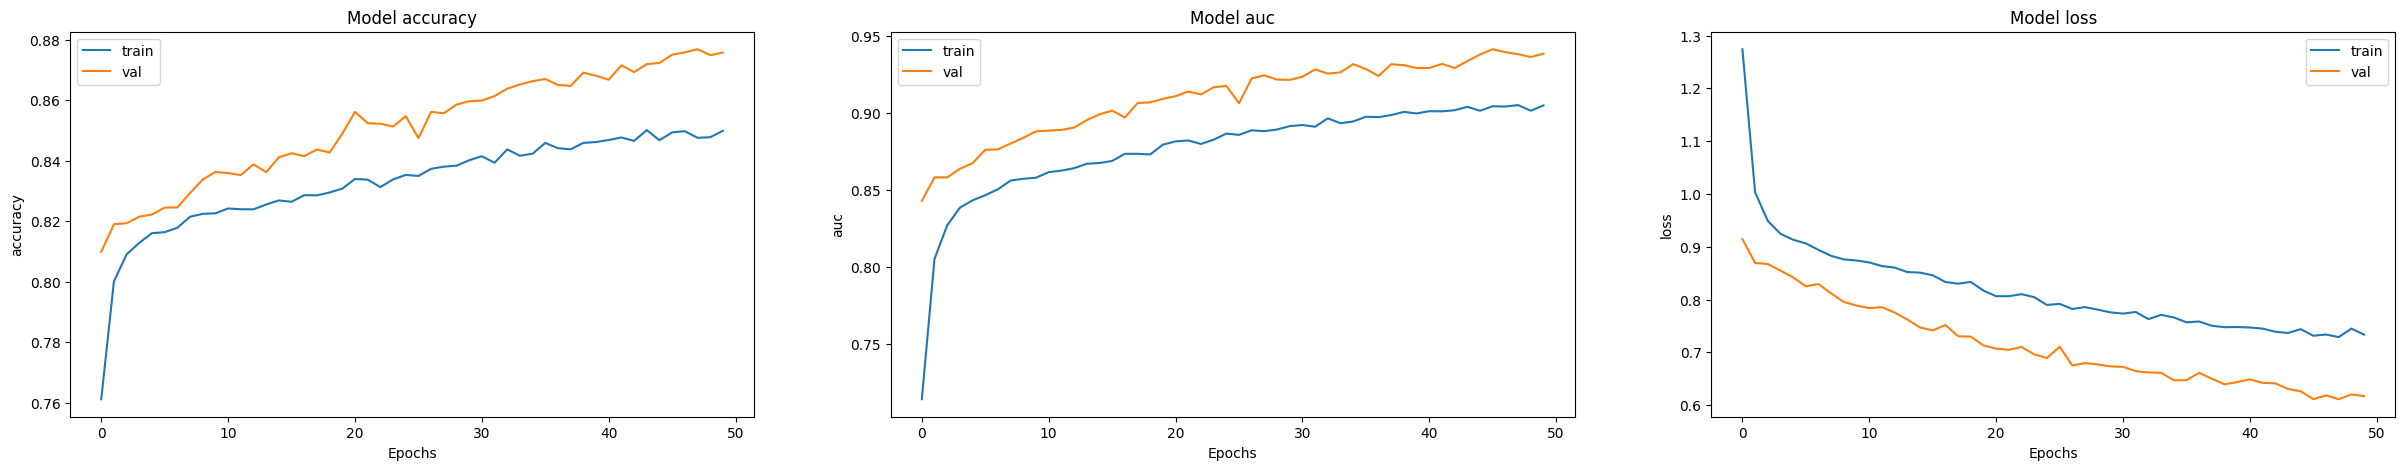

In [27]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])


In [28]:
#Predicting the test data

pred_labels =model.predict(test_data)

126/126 [==============================] - 55s 436ms/step


In [29]:
CLASSES = ['Mild_Dementia', 
           'Moderate_Dementia',
           'Non_Demented',
            'Very_Mild_Dementia']

In [30]:
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                    precision    recall  f1-score   support

     Mild_Dementia       0.81      0.54      0.65       991
 Moderate_Dementia       0.65      0.62      0.64      1018
      Non_Demented       0.65      0.93      0.77      1002
Very_Mild_Dementia       1.00      0.95      0.97       991

         micro avg       0.76      0.76      0.76      4002
         macro avg       0.78      0.76      0.76      4002
      weighted avg       0.78      0.76      0.75      4002
       samples avg       0.76      0.76      0.76      4002



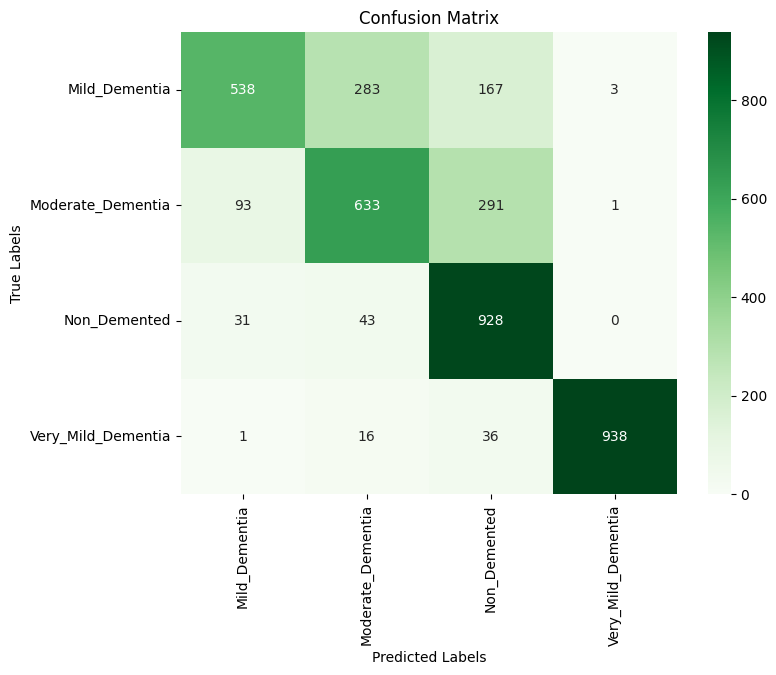

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming test_labels are integer labels
one_hot_test_labels = tf.keras.utils.to_categorical(y_test_int , num_classes=4)

# Get the predicted class labels from the one-hot encoded format
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(one_hot_test_labels, axis=1)

# Compute the confusion matrix
conf_arr = confusion_matrix(test_ls, pred_ls)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()